In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
%matplotlib inline

# Libraries for downloading data from FTP
import shutil
import urllib.request as obj_req
from contextlib import closing
import gzip

remote_path = "https://data.giss.nasa.gov/pub/gistemp/"
file1 = "gistemp1200_ERSSTv5.nc.gz"
file2 = "gistemp250.nc.gz"

recent_files = [file1, file2]

In [2]:
local_storage = "/Users/nathansuberi/Desktop/RW_Data/GISSTEMP/"

for file in recent_files:
    ftp_loc = remote_path + file
    local_file = local_storage + file
    with closing(obj_req.urlopen(ftp_loc)) as r:
        # Unzip the file while copying over
        with gzip.open(r, "rb") as unzipped:
            with open(local_file[:-3], 'wb') as f:
                shutil.copyfileobj(unzipped, f)

In [3]:
temp250 = nc.Dataset(local_storage + "gistemp250.nc")

In [4]:
temp250

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: GISTEMP Surface Temperature Analysis
    institution: NASA Goddard Institute for Space Studies
    source: http://data.giss.nasa.gov/gistemp/
    Conventions: CF-1.6
    history: Created 2017-11-14 09:42:33 by SBBX_to_nc 2.0 - ILAND=250,  IOCEAN=none,     Base: 1951-1980
    dimensions(sizes): lat(90), lon(180), time(1654), nv(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int32 time(time), int32 time_bnds(time,nv), int16 tempanomaly(time,lat,lon)
    groups: 

In [5]:
[var for var in temp250.variables]

['lat', 'lon', 'time', 'time_bnds', 'tempanomaly']

In [6]:
print(temp250.variables["time"].ncattrs())
print(temp250.variables["time"].getncattr('units'))

['long_name', 'units', 'bounds']
days since 1800-01-01 00:00:00


In [7]:
print("Data starts at:", 1800 + temp250.variables["time"][0] / 365)
print("First five values:",temp250.variables["time"][0:5], ", monthly measurements")
print("First five approx years:",[1800 + val / 365 for val in temp250.variables["time"][0:5]])
print("Data goes until:", 1800 + temp250.variables["time"][-1] / 365)

Data starts at: 1880.09041096
First five values: [29233 29264 29293 29324 29354] , monthly measurements
First five approx years: [1880.0904109589042, 1880.1753424657534, 1880.2547945205479, 1880.3397260273973, 1880.4219178082192]
Data goes until: 2017.93150685


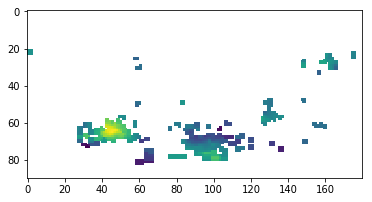

In [8]:
first_temp250_data = temp250.variables["tempanomaly"][0, :, :]
plt.imshow(first_temp250_data)

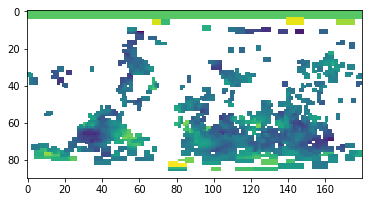

In [9]:
last_temp250_data = temp250.variables["tempanomaly"][-1, :, :]
plt.imshow(last_temp250_data)

In [ ]:
# Reproject using rasterio and/or gdal

data = last_temp250_data

src_crs = "?"
src_width = 

out = local_storage + "gistemp250_edit.tif"
dst_crs = "EPSG:4326"

dst_affine, dst_width, dst_height = calculate_default_transform(
        src.crs, dst_crs, src_width, src_height, *src.bounds)

profile.update({
        'crs': dst_crs,
        'transform': dst_affine,
        'width': dst_width,
        'height': dst_height
    })

with rio.open(out, 'w', **profile) as dst:
    src_array = src.read(indexes=1)
    dst_array = np.empty((dst_height, dst_width), dtype=src.profile["dtype"])

    reproject(
        # Source parameters
        source=data_2030,
        src_crs=src.crs,
        src_transform=src.transform,
        # Destination paramaters
        destination=dst_array,
        dst_transform=dst_affine,
        dst_crs=dst_crs,
        # Configuration
        resampling=Resampling.nearest,
        num_threads=2)

    dst.write(dst_array, indexes=1)